In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# necessary imports 
import pandas as pd
import datetime
import matplotlib.pyplot as plt 
import numpy as np
import os
import pickle
import seaborn as sns

In [4]:
# Show plots in jupyter notebook
%matplotlib inline

In [5]:
# Set plot style
sns.set(color_codes=True)

In [6]:
# Set maximum number of columns to be displayed
pd.set_option('display.max_columns', 100)

In [7]:
# load the data 
df = pd.read_csv('/content/drive/MyDrive/Hamed Presentation /clean_data_after_eda.csv')

In [8]:
df

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,var_year_price_p1_var,var_year_price_p3_var,var_year_price_p2_var,var_year_price_p1_fix,var_year_price_p3_fix,var_year_price_p2_fix,var_year_price_p1,var_year_price_p2,var_year_price_p3,var_6m_price_p1_var,var_6m_price_p3_var,var_6m_price_p2_var,var_6m_price_p1_fix,var_6m_price_p3_fix,var_6m_price_p2_fix,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.000061,2.627605e-05,4.402763e-04,1.102785e+00,49.550703,22.022535,1.102846,22.022975,4.955073e+01,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,4.423670e+01,9.953056e+01,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.000005,6.089453e-04,0.000000e+00,6.464779e-03,0.000000,0.000000,0.006470,0.000000,6.089453e-04,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,0.000000e+00,1.217891e-03,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.000006,2.558511e-07,0.000000e+00,7.661891e-03,0.000000,0.000000,0.007668,0.000000,2.558511e-07,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,0.000000e+00,9.450150e-08,0
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.000005,0.000000e+00,0.000000e+00,6.464721e-03,0.000000,0.000000,0.006470,0.000000,0.000000e+00,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.000015,3.552481e-06,2.522046e-06,5.428942e-03,0.001954,0.000869,0.005444,0.000871,1.957971e-03,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,4.860000e-10,2.896760e-06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0.000015,0.000000e+00,0.000000e+00,8.380216e-03,0.000000,0.000000,0.008395,0.000000,0.000000e+00,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
14602,14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,0.000013,3.472391e-06,1.638788e-08,1.358132e-02,0.005165,0.000272,0.013595,0.000272,5.168489e-03,0.000009,2.225451e-06,1.802667e-08,0.014939,0.005682,0.000299,0.014948,2.987132e-04,5.684001e-03,1
14603,14603,10e6828ddd62cb

## FEATURE ENGINEERING

1. Lets correct the date time formats first in the data frames

In [9]:
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [10]:
df

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,var_year_price_p1_var,var_year_price_p3_var,var_year_price_p2_var,var_year_price_p1_fix,var_year_price_p3_fix,var_year_price_p2_fix,var_year_price_p1,var_year_price_p2,var_year_price_p3,var_6m_price_p1_var,var_6m_price_p3_var,var_6m_price_p2_var,var_6m_price_p1_fix,var_6m_price_p3_fix,var_6m_price_p2_fix,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.000061,2.627605e-05,4.402763e-04,1.102785e+00,49.550703,22.022535,1.102846,22.022975,4.955073e+01,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,4.423670e+01,9.953056e+01,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.000005,6.089453e-04,0.000000e+00,6.464779e-03,0.000000,0.000000,0.006470,0.000000,6.089453e-04,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,0.000000e+00,1.217891e-03,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.000006,2.558511e-07,0.000000e+00,7.661891e-03,0.000000,0.000000,0.007668,0.000000,2.558511e-07,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,0.000000e+00,9.450150e-08,0
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.000005,0.000000e+00,0.000000e+00,6.464721e-03,0.000000,0.000000,0.006470,0.000000,0.000000e+00,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.000015,3.552481e-06,2.522046e-06,5.428942e-03,0.001954,0.000869,0.005444,0.000871,1.957971e-03,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,4.860000e-10,2.896760e-06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0.000015,0.000000e+00,0.000000e+00,8.380216e-03,0.000000,0.000000,0.008395,0.000000,0.000000e+00,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
14602,14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,0.000013,3.472391e-06,1.638788e-08,1.358132e-02,0.005165,0.000272,0.013595,0.000272,5.168489e-03,0.000009,2.225451e-06,1.802667e-08,0.014939,0.005682,0.000299,0.014948,2.987132e-04,5.684001e-03,1
14603,14603,10e6828ddd62cb

## Price Data

Lets read the price data and build some predictive features with the price data 

In [11]:
df_price = pd.read_csv("/content/drive/MyDrive/Hamed Presentation /price_data.csv")

In [12]:
df_price.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


changing the date format for the price dat column 

In [13]:
df_price["price_date"] = pd.to_datetime(df_price["price_date"],format='%Y-%m-%d')

In [21]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [22]:
df_price.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [23]:
monthly_price_data = df_price.groupby(["price_date"]).mean().reset_index()

In [28]:
monthly_price_data.head(12)

,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,2015-01-01,0.142568,0.054950,0.030333,43.226643,10.692921,6.455861
1,2015-02-01,0.142767,0.055053,0.030367,43.238161,10.673719,6.449016
2,2015-03-01,0.143104,0.055118,0.030396,43.254033,10.644489,6.430121
3,2015-04-01,0.143259,0.056035,0.030492,43.288439,10.647277,6.423156
4,2015-05-01,0.143534,0.055359,0.030393,43.315388,10.602453,6.390806
5,2015-06-01,0.143731,0.055255,0.029902,43.347320,10.415769,6.281304
6,2015-07-01,0.143683,0.055369,0.030636,43.345012,10.642236,6.421464
7,2015-08-01,0.137933,0.053605,0.030717,43.365366,10.661678,6.431518
8,2015-09-01,0.137933,0.053532,0.030606,43.351874,10.602979,6.391788
9,2015-10-01,0.137899,0.053713,0.030641,43.354226,10.605431,6.396084


In [31]:
price_data = pd.DataFrame()
price_data["price_date"] = monthly_price_data["price_date"]
price_data["price_off_peak"] = monthly_price_data["price_off_peak_var"]+monthly_price_data["price_off_peak_fix"]
price_data["price_peak"] = monthly_price_data["price_peak_var"]+monthly_price_data["price_peak_fix"]
price_data["price_mid_peak"] = monthly_price_data["price_mid_peak_var"]+monthly_price_data["price_mid_peak_fix"]

In [32]:
price_data.head(12)

,price_date,price_off_peak,price_peak,price_mid_peak
0,2015-01-01,43.369211,10.747871,6.486193
1,2015-02-01,43.380929,10.728772,6.479383
2,2015-03-01,43.397137,10.699607,6.460518
3,2015-04-01,43.431698,10.703311,6.453648
4,2015-05-01,43.458922,10.657812,6.421198
5,2015-06-01,43.491051,10.471024,6.311206
6,2015-07-01,43.488695,10.697605,6.452101
7,2015-08-01,43.503299,10.715283,6.462234
8,2015-09-01,43.489807,10.656512,6.422394
9,2015-10-01,43.492125,10.659144,6.426725


If we go monthwise ignoring the companies we note an interesting observation. The mean prices for all companies remains the same. Hence we need to aggregate the prices for the companies. 

Since we have the consumption data for each of the companies for the year 2015, we will create new features using the average of the year, the last six months, and the last three months to our model. This will provide us with more nuanced analysis into our price data and help our model predict better. Although we have the consumption data for each month of the companies, this is also a useful data but the data for six months, 3 months and a year will give in more concrete insights. 

Taking up the mean values for the prices of a particular company for the entire year in peak, mid peak and off peak season, from the monthly values 

In [14]:
mean_year = df_price.groupby(["id"]).mean().reset_index()

In [25]:
mean_year.head(5)

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


Calculating the mean price for 6 months for all the companies. In this case we have taken the six month mean for the later half of the year. 

In [17]:
mean_6m = df_price[df_price["price_date"] > "2015-06-01"].groupby(["id"]).mean().reset_index()

In [18]:
mean_6m.head(2)

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000


Obtaining the mean data in a similar fashion for last three months. These features will provide us an insights about the last quarter. 

In [19]:
mean_3m = df_price[df_price["price_date"] > "2015-10-01"].groupby(["id"]).mean().reset_index()

In [20]:
mean_3m.head(2)

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000


In [34]:
mean_year = mean_year.rename(index=str, columns={"price_off_peak_var": "mean_year_price_p1_var", 
                                                 "price_peak_var": "mean_year_price_p2_var", 
                                                 "price_mid_peak_var": "mean_year_price_p3_var", 
                                                 "price_off_peak_fix": "mean_year_price_p1_fix", 
                                                 "price_peak_fix": "mean_year_price_p2_fix",
                                                 "price_mid_peak_fix": "mean_year_price_p3_fix",}) 
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"] 
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"] 
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]

In [35]:
mean_6m = mean_6m.rename(index=str, columns={"price_off_peak_var": "mean_6m_price_p1_var", 
                                                 "price_peak_var": "mean_6m_price_p2_var", 
                                                 "price_mid_peak_var": "mean_6m_price_p3_var", 
                                                 "price_off_peak_fix": "mean_6m_price_p1_fix", 
                                                 "price_peak_fix": "mean_6m_price_p2_fix",
                                                 "price_mid_peak_fix": "mean_6m_price_p3_fix",}) 
mean_6m["mean_6m_price_p1"] = mean_6m["mean_6m_price_p1_var"] + mean_6m["mean_6m_price_p1_fix"] 
mean_6m["mean_6m_price_p2"] = mean_6m["mean_6m_price_p2_var"] + mean_6m["mean_6m_price_p2_fix"] 
mean_6m["mean_6m_price_p3"] = mean_6m["mean_6m_price_p3_var"] + mean_6m["mean_6m_price_p3_fix"]

In [36]:
mean_3m = mean_3m.rename(index=str, columns={"price_off_peak_var": "mean_3m_price_p1_var", 
                                                 "price_peak_var": "mean_3m_price_p2_var", 
                                                 "price_mid_peak_var": "mean_3m_price_p3_var", 
                                                 "price_off_peak_fix": "mean_3m_price_p1_fix", 
                                                 "price_peak_fix": "mean_3m_price_p2_fix",
                                                 "price_mid_peak_fix": "mean_3m_price_p3_fix",}) 
mean_3m["mean_3m_price_p1"] = mean_3m["mean_3m_price_p1_var"] + mean_3m["mean_3m_price_p1_fix"] 
mean_3m["mean_3m_price_p2"] = mean_3m["mean_3m_price_p2_var"] + mean_3m["mean_3m_price_p2_fix"] 
mean_3m["mean_3m_price_p3"] = mean_3m["mean_3m_price_p3_var"] + mean_3m["mean_3m_price_p3_fix"]

Now as we have seen before that price variables are highly correlated so we may not need to include mean_6m and mean_3m into our target list. This will not yield us concrete results and hence we can have the mean prices for the year included in our feature maps. 

In [37]:
features = mean_year

## EDA DATA

1. Lets generate a new feature from the given features of dates as tenure for the company. In our case we will take this as the difference between date of activation of contract and date of end of contract 

In [38]:
df["tenure"] = ((df["date_end"]-df["date_activ"])/ np.timedelta64(1, "Y")).astype(int)

In [40]:
tenure = df[["tenure", "churn", "id"]].groupby(["tenure", "churn"])["id"].count().unstack(level=1) 
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)

In [42]:
tenure

churn,0,1
tenure,,
2,228,35
3,1001,168
4,3323,478
5,2805,262
6,2836,249
7,2424,192
8,119,6
9,81,2
10,49,1


In [41]:
tenure_percentage

churn,0,1
tenure,,
2,86.692015,13.307985
3,85.628743,14.371257
4,87.424362,12.575638
5,91.457450,8.542550
6,91.928687,8.071313
7,92.660550,7.339450
8,95.200000,4.800000
9,97.590361,2.409639
10,98.000000,2.000000


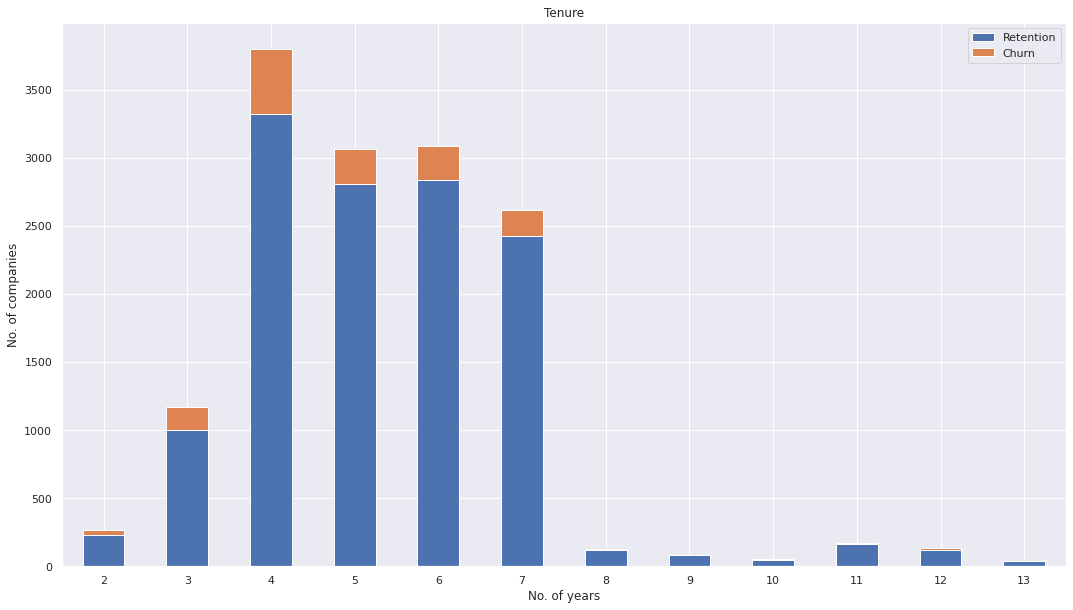

In [43]:
tenure.plot(kind="bar", rot=0,figsize=(18,10), stacked=True,title= "Tenure")

#Rename Legend
plt.legend(["Retention", "Churn"], loc="upper right") # Labels
plt.ylabel("No. of companies")
plt.xlabel("No. of years")
plt.show()

We can clearly that churn is very low for companies which joined recently or that have made the contract a long time ago. With the higher number of churners within the 3-7 years of tenure.

In [47]:
print("Date Active Max and Min Range :",df["date_activ"].max(), df["date_activ"].min())
print("Date End Max and Min Range :",df["date_end"].max(), df["date_end"].min())
print("Date Modified Max and Min Range :",df["date_modif_prod"].max(), df["date_modif_prod"].min())
print("Date Renewal Max and Min Range :",df["date_renewal"].max(), df["date_renewal"].min())

Date Active Max and Min Range : 2014-09-01 00:00:00 2003-05-09 00:00:00
Date End Max and Min Range : 2017-06-13 00:00:00 2016-01-28 00:00:00
Date Modified Max and Min Range : 2016-01-29 00:00:00 2003-05-09 00:00:00
Date Renewal Max and Min Range : 2016-01-28 00:00:00 2013-06-26 00:00:00


Most of the contracts are terminating for the companies between 2016 and 2017. Hence we will take a reference date of Jan 1st 2016 and will create the following features for more clarity. 

1. No. of months active according to the reference date
2. No. of months to the contract left at the refence date 
3. No. of months since last modification 
4. No. of months since last renewal 

In [48]:
# Function to convert the difference from reference date into months 
def convert_months(reference_date, dataframe, column): 
  """
  Input a column with timedeltas and return months
  """
  time_delta = reference_date - dataframe[column]
  months = (time_delta / np.timedelta64(1, "M")).astype(int) 
  return months

In [49]:
# Create reference date 
REFERENCE_DATE = datetime.datetime(2016,1,1)

In [50]:
df["months_activ"] = convert_months(REFERENCE_DATE, df, "date_activ") 
df["months_to_end"] = -convert_months(REFERENCE_DATE, df, "date_end") 
df["months_modif_prod"] = convert_months(REFERENCE_DATE, df, "date_modif_prod") 
df["months_renewal"] = convert_months(REFERENCE_DATE, df, "date_renewal")

Let's check whether we are abale to build some insights from this 

In [53]:
def plot_churn_by_month(dataframe, column, fontsize_=11): 
  """
  Plot churn distribution by monthly variable
  """
  temp = dataframe[[column, "churn", "id"]].groupby([column, "churn"])["id"].count().unstack(level=1) 
  temp.plot(kind="bar",figsize=(18,10), stacked=True, rot=0,title= column)
      # Rename legend
  plt.legend(["Retention", "Churn"], loc="upper right") # Labels
  plt.ylabel("No. of companies")
  plt.xlabel("No. of months")
      # Set xlabel fontsize
  plt.xticks(fontsize=fontsize_) 
  plt.show()

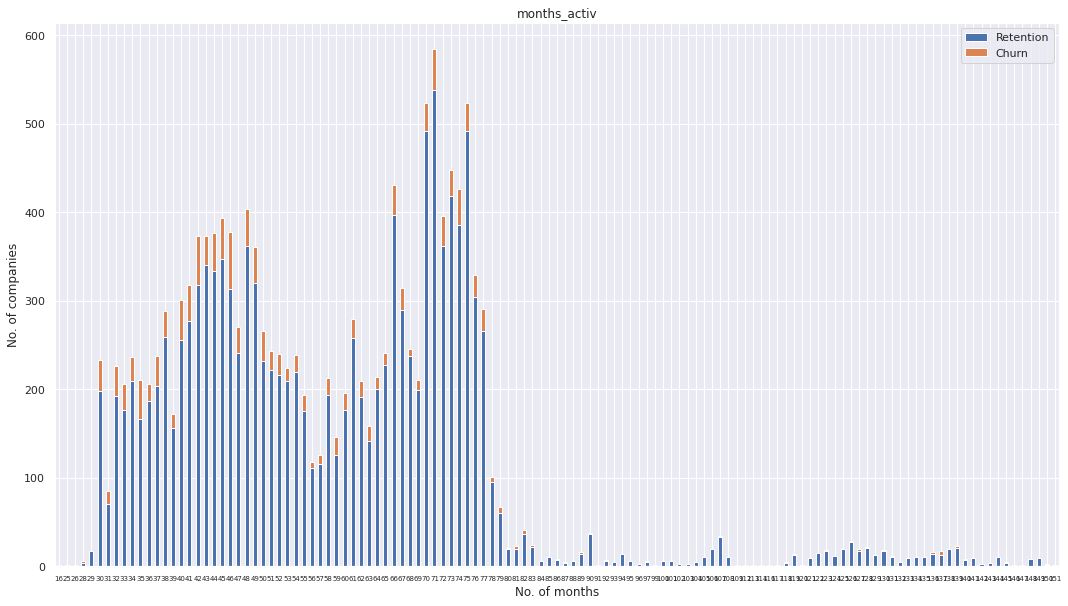

In [54]:
plot_churn_by_month(df, "months_activ", 7)

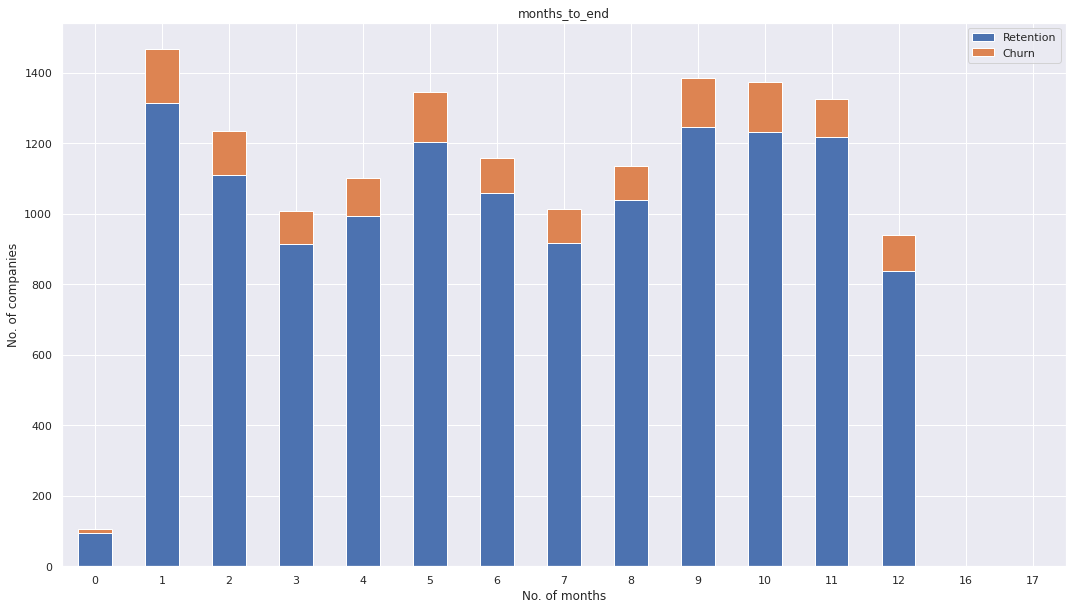

In [55]:
plot_churn_by_month(df, "months_to_end")

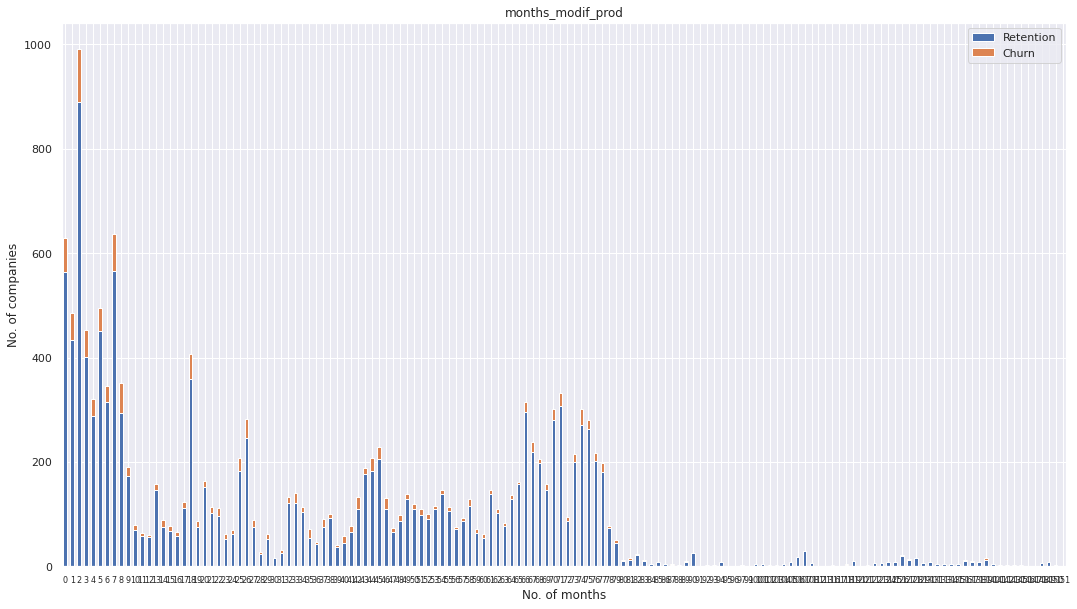

In [56]:
plot_churn_by_month(df, "months_modif_prod", 8)

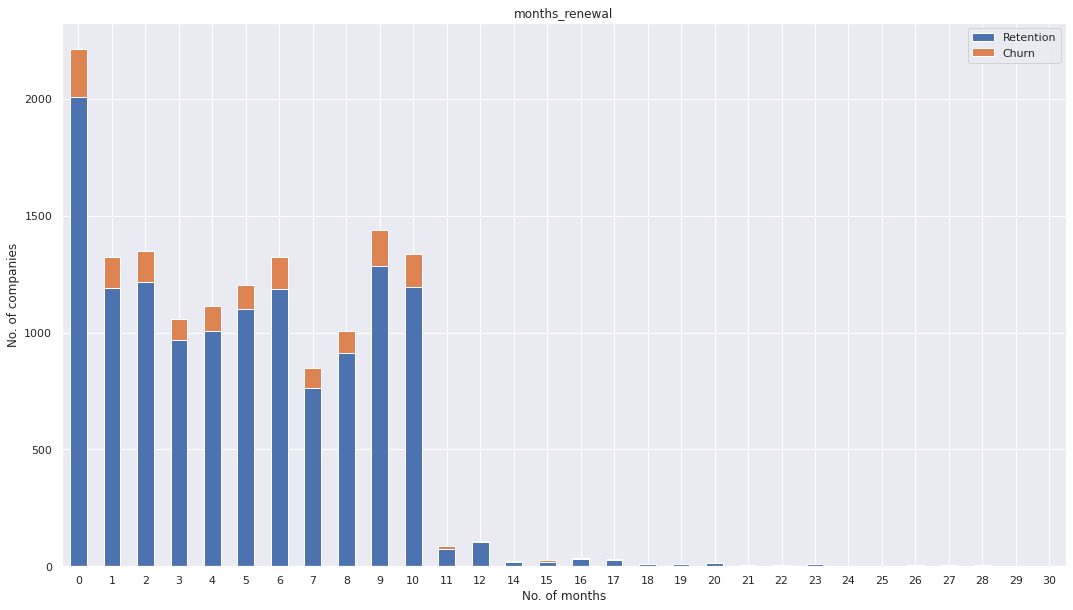

In [57]:
plot_churn_by_month(df, "months_renewal")

Lets now remove the date columns as we already have extracted the features from those columns. 

In [58]:
df.drop(columns=["date_activ", "date_end", "date_modif_prod", "date_renewal"],inplace=True)

## Categorical Features

Lets transform some boolean data using one-hot encoding. 

In [59]:
df["has_gas"]=df["has_gas"].replace(["t", "f"],[1,0])

Lets handle the textual features as well. As we cannot pass text to our model we may need to label the textual features in our model. The problem with labelling multiple categorical features is that we may end up providing heirarchy to them which may not exist. For e.g we may label the features as 1,2,3,... 

Hence we opt for one hot encoding making each category in the textual feature a new feature in itself. Also if we have 7 categories in textual features we may delete one category easily owing to its multicolinearity with other features. If I know the answer for 6 of them then its not very difficult to predict the 7th one. 

In [60]:
df["channel_sales"] = df["channel_sales"].fillna("null_values_channel")

Now transform the channel_sales column into categorical data type

In [61]:
# Transform to categorical data type
df["channel_sales"] = df["channel_sales"].astype("category")

We want to see how many categories we will end up with

In [62]:
pd.DataFrame({"Samples in category": df["channel_sales"].value_counts()})

,Samples in category
foosdfpfkusacimwkcsosbicdxkicaua,6754
MISSING,3725
lmkebamcaaclubfxadlmueccxoimlema,1843
usilxuppasemubllopkaafesmlibmsdf,1375
ewpakwlliwisiwduibdlfmalxowmwpci,893
sddiedcslfslkckwlfkdpoeeailfpeds,11
epumfxlbckeskwekxbiuasklxalciiuu,3
fixdbufsefwooaasfcxdxadsiekoceaa,2



So that means we will create 8 different dummy variables . Each variable will become a different column.

In [63]:
# Create dummy variables
categories_channel = pd.get_dummies(df["channel_sales"], prefix = "channel")

In [64]:
# Rename columns for simplicity
categories_channel.columns = [col_name[:11] for col_name in categories_channel.columns]

In [65]:
categories_channel.head(5)

,channel_MIS,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi
0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0


In [66]:
categories_channel.drop(columns=["channel_MIS"],inplace=True)

We will perform same operations for origin_up

In [67]:
df["origin_up"] = df["origin_up"].fillna("null_values_origin")

Now transform the origin_up column into categorical data type

In [68]:
df["origin_up"] = df["origin_up"].astype("category")

In [69]:
pd.DataFrame({"Samples in category": df["origin_up"].value_counts()})

,Samples in category
lxidpiddsbxsbosboudacockeimpuepw,7097
kamkkxfxxuwbdslkwifmmcsiusiuosws,4294
ldkssxwpmemidmecebumciepifcamkci,3148
MISSING,64
usapbepcfoloekilkwsdiboslwaxobdp,2
ewxeelcelemmiwuafmddpobolfuxioce,1


So that means we will create 8 different dummy variables . Each variable will become a different column.

In [70]:
# Create dummy variables
categories_origin = pd.get_dummies(df["origin_up"], prefix = "origin")
# Rename columns for simplicity
categories_origin.columns = [col_name[:10] for col_name in categories_origin.columns]

In [71]:
categories_origin.head(5)

,origin_MIS,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa
0,0,0,0,0,1,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [72]:
categories_origin.drop(columns=["origin_MIS"],inplace=True)

Lets merge these dummy variables to main dataframe 

In [77]:
# Use common index to merge
df = pd.merge(df, categories_channel, left_index=True, right_index=True) 
df = pd.merge(df, categories_origin, left_index=True, right_index=True) 

In [79]:
df.drop(columns=["channel_sales", "origin_up"],inplace=True)

## Dealing Skewness in the Data 

IN EDA we saw a lot of skewed data which was positively skewed. There is one way to normalise this data into a bell shaped gaussian curve. For this purpose we may use two types of transformations i.e log transform and exponential transform. It is very important to make this data normalised so as to prevent bias into the model. 

Skewness is not "bad" per se. Nonetheless, some predective models make fundamental assumptions related to variables being "normally distributed". Hence, the model will perform poorly if the data is highly skewed.

There are several methods in which we can reduce skewness such as square root , cube root , and log . In this case, we will use a log transformation which is usually recommended for right skewed data.

In [80]:
df.describe()

,Unnamed: 0,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,var_year_price_p1_var,var_year_price_p3_var,var_year_price_p2_var,var_year_price_p1_fix,var_year_price_p3_fix,var_year_price_p2_fix,var_year_price_p1,var_year_price_p2,var_year_price_p3,var_6m_price_p1_var,var_6m_price_p3_var,var_6m_price_p2_var,var_6m_price_p1_fix,var_6m_price_p3_fix,var_6m_price_p2_fix,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa
count,14606.000000,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,1.460600e+04,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,1.460600e+04,14606.000000,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,7302.500000,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,0.181501,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.000041,4.465085e-05,2.084945e-05,6.895442e-01,2.124022,0.885974,0.689585,0.885995,2.124067e+00,0.000025,3.304264e-05,1.406015e-05,0.922810,1.460247,0.634413,0.922835,6.344275e-01,1.460280e+00,0.097152,5.317952,58.567301,6.393537,35.464056,4.910516,0.000205,0.061139,0.000137,0.462413,0.126181,0.000753,0.094139,0.000068,0.293989,0.215528,0.485896,0.000137
std,4216.533351,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,0.385446,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.000219,2.137995e-04,1.274796e-04,1.101429e+01,13.568663,5.698189,11.014406,5.698312,1.356876e+01,0.000204,2.231791e-04,1.273170e-04,18.218286,13.760009,5.895346,18.218452,5.895470e+00,1.376010e+01,0.296175,1.695866,19.366745,3.513031,30.248229,3.795906,0.014331,0.239594,0.011701,0.498602,0.332065,0.027434,0.292033,0.008274,0.455602,0.411202,0.499818,0.011701
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,2.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3651.250000,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000005,0.000000e+00,0.000000e+00,3.436364e-12,0.000000,0.000000,0.000027,0.000000,0.000000e+00,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000004,0.000000e+00,0.000000e+00,0.000000,4.000000,44.000000,3.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7302.500000,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,0.000000,37.395000,21.640000,21.640000,1.0

Particularly relevant to look at the standard deviation std which is very very high for some variables.

Log trabsformation works differently for positive and negative data. Although we tend to remove the negative data or consider it as a NAN value in order to apply a uniform log transformation. In our dataset as described above we do not have any negative data. So we are good to go. 

value x is transformed to value log(1+x)

In [81]:
# Remove negative values
df.loc[df.cons_12m < 0,"cons_12m"] = np.nan
df.loc[df.cons_gas_12m < 0,"cons_gas_12m"] = np.nan 
df.loc[df.cons_last_month < 0,"cons_last_month"] = np.nan 
df.loc[df.forecast_cons_12m < 0,"forecast_cons_12m"] = np.nan 
df.loc[df.forecast_cons_year < 0,"forecast_cons_year"] = np.nan 
df.loc[df.forecast_meter_rent_12m < 0,"forecast_meter_rent_12m"] = np.nan 
df.loc[df.imp_cons < 0,"imp_cons"] = np.nan

In [82]:
# Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"]+1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"]+1) 
df["cons_last_month"] = np.log10(df["cons_last_month"]+1) 
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"]+1) 
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"]+1) 
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"]+1) 
df["imp_cons"] = np.log10(df["imp_cons"]+1)

Lets visualise the distribution for these skewed parameters now 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

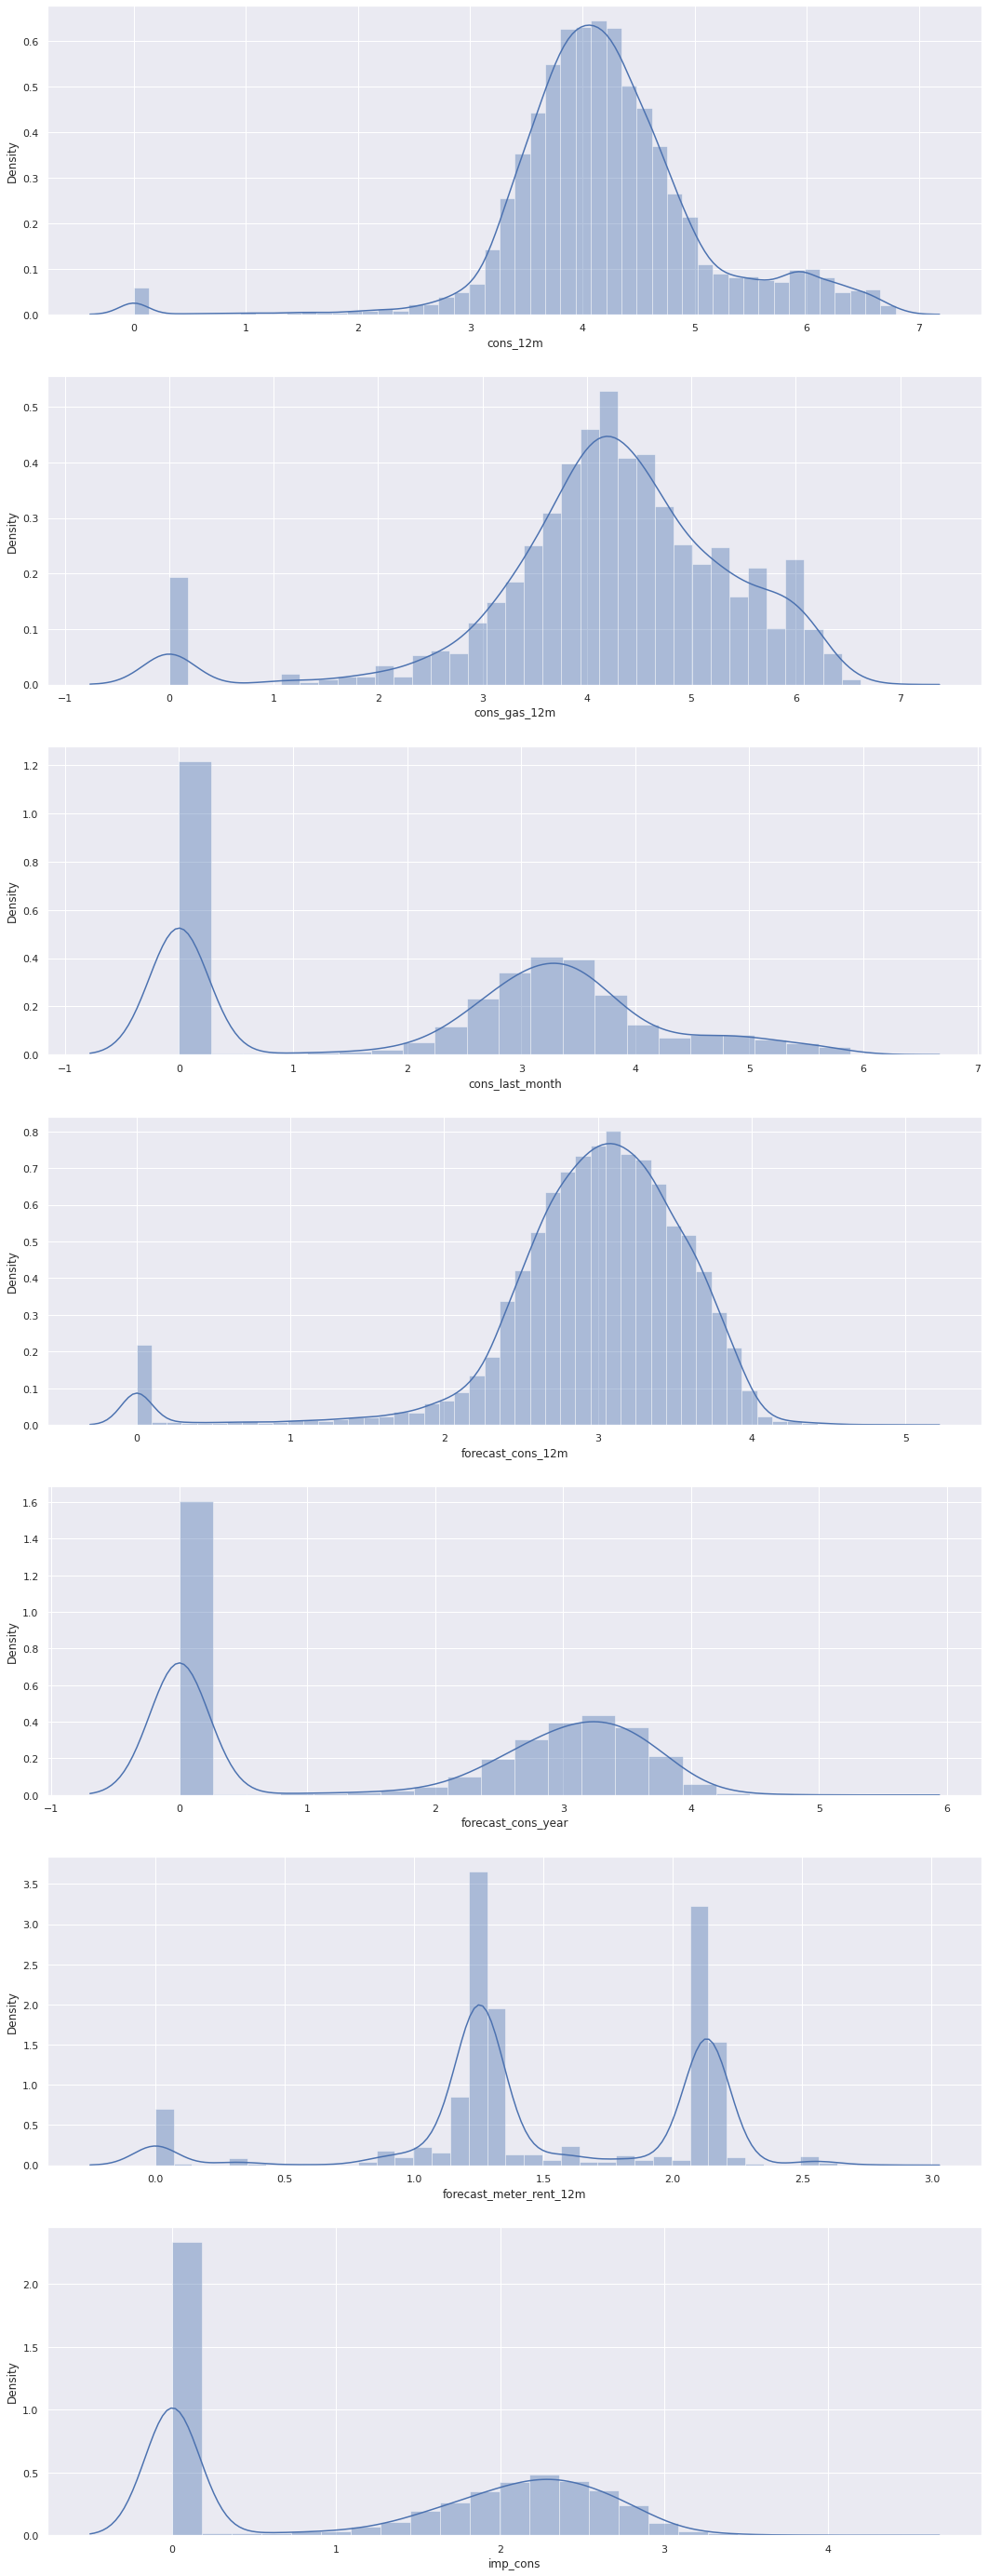

In [83]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0]) 
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1]) 
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2]) 
sns.distplot((df["forecast_cons_12m"].dropna()), ax=axs[3]) 
sns.distplot((df["forecast_cons_year"].dropna()), ax=axs[4]) 
sns.distplot((df["forecast_meter_rent_12m"].dropna()), ax=axs[5]) 
sns.distplot((df["imp_cons"].dropna()), ax=axs[6])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

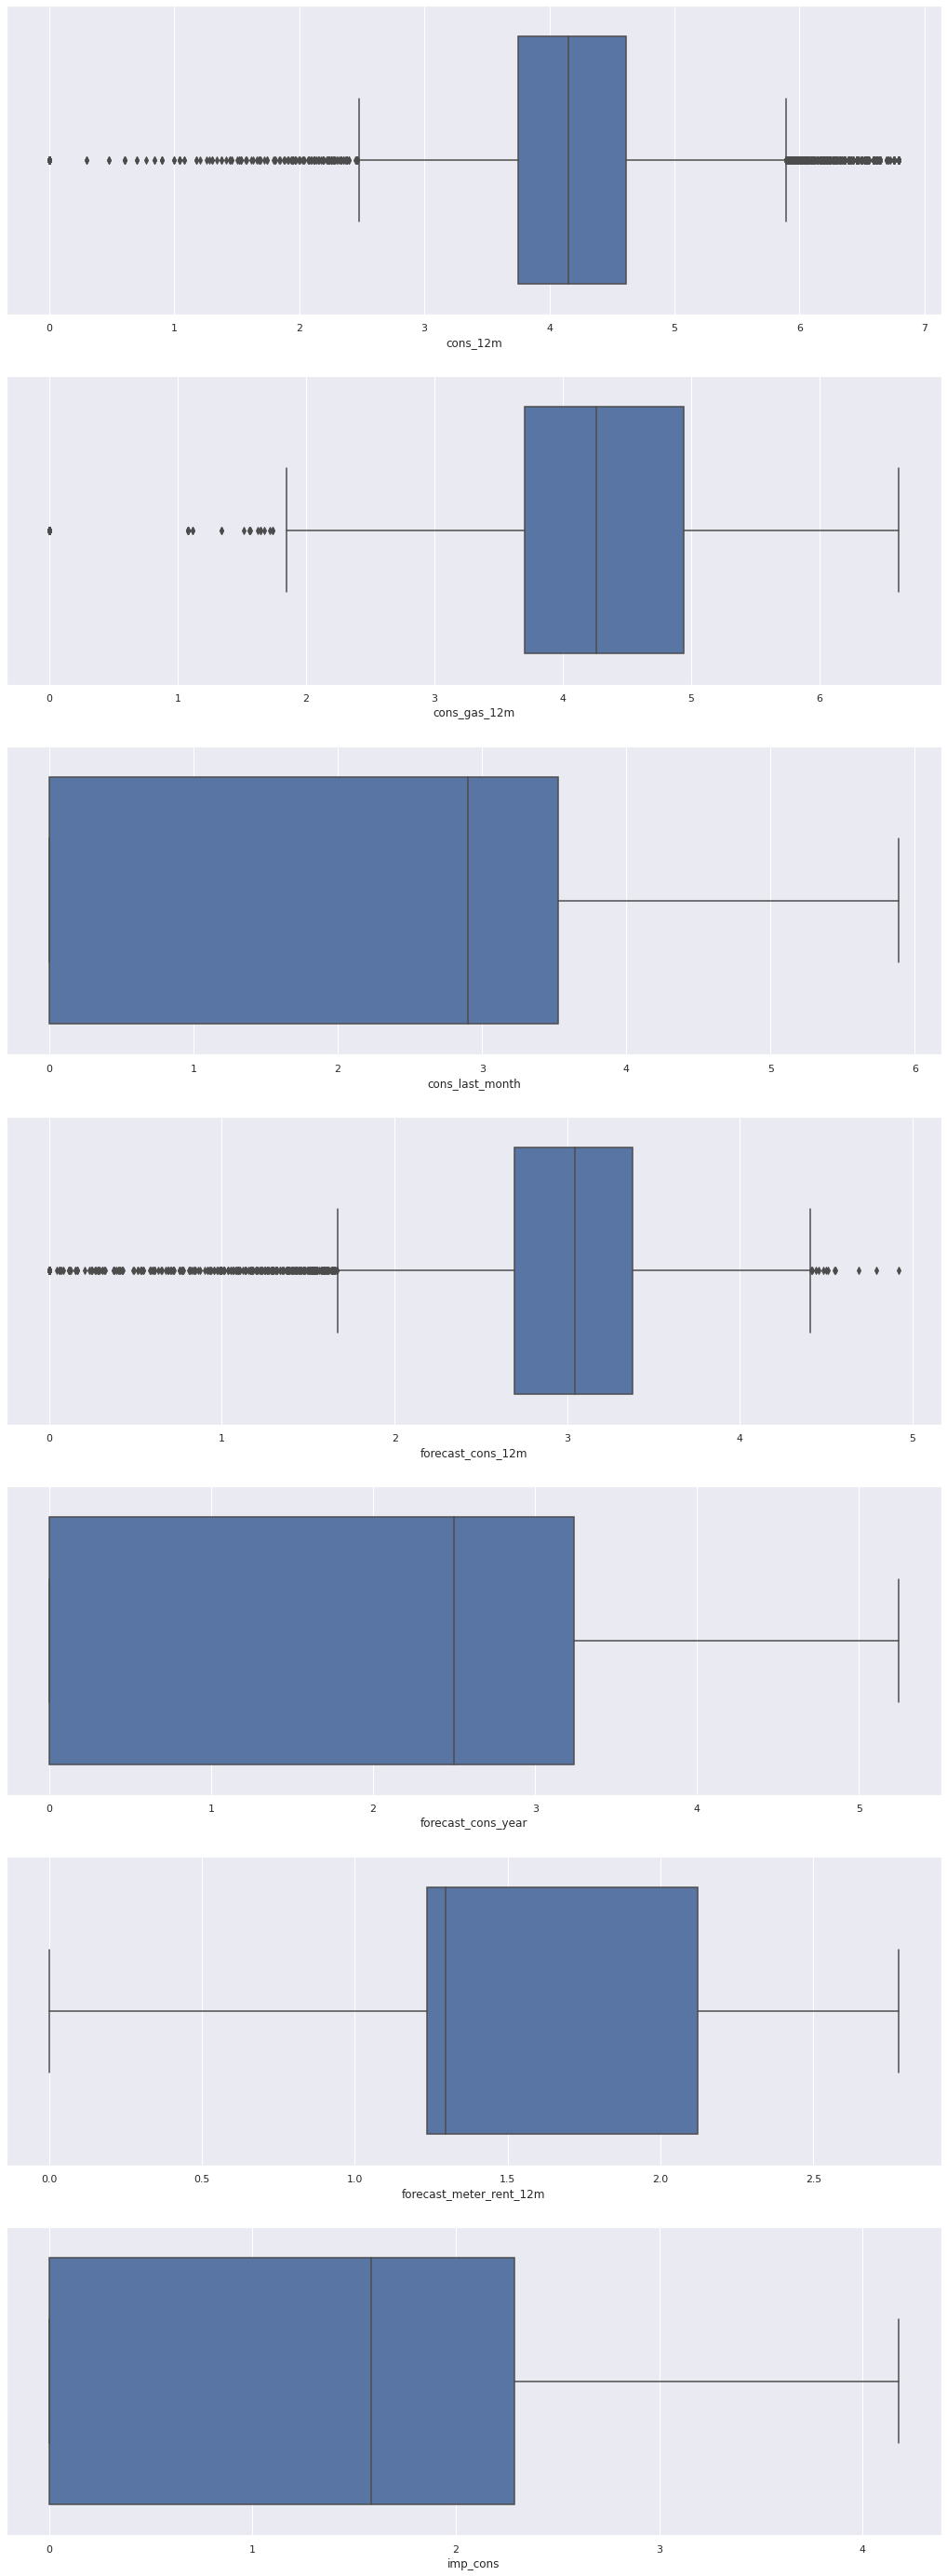

In [85]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((df["cons_12m"].dropna()), ax=axs[0]) 
sns.boxplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1]) 
sns.boxplot((df["cons_last_month"].dropna()), ax=axs[2]) 
sns.boxplot((df["forecast_cons_12m"].dropna()), ax=axs[3]) 
sns.boxplot((df["forecast_cons_year"].dropna()), ax=axs[4]) 
sns.boxplot((df["forecast_meter_rent_12m"].dropna()), ax=axs[5]) 
sns.boxplot((df["imp_cons"].dropna()), ax=axs[6])
plt.show()

In [86]:
df.describe()

,Unnamed: 0,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,var_year_price_p1_var,var_year_price_p3_var,var_year_price_p2_var,var_year_price_p1_fix,var_year_price_p3_fix,var_year_price_p2_fix,var_year_price_p1,var_year_price_p2,var_year_price_p3,var_6m_price_p1_var,var_6m_price_p3_var,var_6m_price_p2_var,var_6m_price_p1_fix,var_6m_price_p3_fix,var_6m_price_p2_fix,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,1.460600e+04,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,1.460600e+04,14606.000000,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,7302.500000,4.223939,0.779244,2.264646,2.962177,1.784610,0.966726,1.517203,0.137283,0.050491,43.130056,0.181501,1.240750,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.000041,4.465085e-05,2.084945e-05,6.895442e-01,2.124022,0.885974,0.689585,0.885995,2.124067e+00,0.000025,3.304264e-05,1.406015e-05,0.922810,1.460247,0.634413,0.922835,6.344275e-01,1.460280e+00,0.097152,5.317952,58.567301,6.393537,35.464056,4.910516,0.000205,0.061139,0.000137,0.462413,0.126181,0.000753,0.094139,0.000068,0.293989,0.215528,0.485896,0.000137
std,4216.533351,0.884515,1.717071,1.769305,0.683592,1.584986,5.108289,0.571481,0.024623,0.049037,4.485988,0.385446,1.138322,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.000219,2.137995e-04,1.274796e-04,1.101429e+01,13.568663,5.698189,11.014406,5.698312,1.356876e+01,0.000204,2.231791e-04,1.273170e-04,18.218286,13.760009,5.895346,18.218452,5.895470e+00,1.376010e+01,0.296175,1.695866,19.366745,3.513031,30.248229,3.795906,0.014331,0.239594,0.011701,0.498602,0.332065,0.027434,0.292033,0.008274,0.455602,0.411202,0.499818,0.011701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,2.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3651.250000,3.754023,0.000000,0.000000,2.695477,0.000000,0.000000,1.235023,0.116340,0.000000,40.606701,0.000000,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000005,0.000000e+00,0.000000e+00,3.436364e-12,0.000000,0.000000,0.000027,0.000000,0.000000e+00,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000004,0.000000e+00,0.000000e+00,0.000000,4.000000,44.000000,3.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7302.500000,4.149727,0.000000,2.899547,3.046836,2.498311,0.000000,1.296555,0.143166,0.084138,44.311378,0.000000,1.584275,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000009,9.423024e-07,0.000000e+00,6.46476

Now look at the standard deviation. It looks much more normalised than before. The column Unnamed: 0 is the index column that has been read owing to pandas reading the csv file. Lets remove this column from our analysis. 

In [87]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [88]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,var_year_price_p1_var,var_year_price_p3_var,var_year_price_p2_var,var_year_price_p1_fix,var_year_price_p3_fix,var_year_price_p2_fix,var_year_price_p1,var_year_price_p2,var_year_price_p3,var_6m_price_p1_var,var_6m_price_p3_var,var_6m_price_p2_var,var_6m_price_p1_fix,var_6m_price_p3_fix,var_6m_price_p2_fix,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,1.460600e+04,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,1.460600e+04,14606.000000,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,4.223939,0.779244,2.264646,2.962177,1.784610,0.966726,1.517203,0.137283,0.050491,43.130056,0.181501,1.240750,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.000041,4.465085e-05,2.084945e-05,6.895442e-01,2.124022,0.885974,0.689585,0.885995,2.124067e+00,0.000025,3.304264e-05,1.406015e-05,0.922810,1.460247,0.634413,0.922835,6.344275e-01,1.460280e+00,0.097152,5.317952,58.567301,6.393537,35.464056,4.910516,0.000205,0.061139,0.000137,0.462413,0.126181,0.000753,0.094139,0.000068,0.293989,0.215528,0.485896,0.000137
std,0.884515,1.717071,1.769305,0.683592,1.584986,5.108289,0.571481,0.024623,0.049037,4.485988,0.385446,1.138322,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.000219,2.137995e-04,1.274796e-04,1.101429e+01,13.568663,5.698189,11.014406,5.698312,1.356876e+01,0.000204,2.231791e-04,1.273170e-04,18.218286,13.760009,5.895346,18.218452,5.895470e+00,1.376010e+01,0.296175,1.695866,19.366745,3.513031,30.248229,3.795906,0.014331,0.239594,0.011701,0.498602,0.332065,0.027434,0.292033,0.008274,0.455602,0.411202,0.499818,0.011701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,2.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.754023,0.000000,0.000000,2.695477,0.000000,0.000000,1.235023,0.116340,0.000000,40.606701,0.000000,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000005,0.000000e+00,0.000000e+00,3.436364e-12,0.000000,0.000000,0.000027,0.000000,0.000000e+00,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000004,0.000000e+00,0.000000e+00,0.000000,4.000000,44.000000,3.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.149727,0.000000,2.899547,3.046836,2.498311,0.000000,1.296555,0.143166,0.084138,44.311378,0.000000,1.584275,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000009,9.423024e-07,0.000000e+00,6.464760e-03,0.000000,0.000000,0.006470,0.000000,9.423024e-07,0.000004,9.450150e-08,0.00

## High Correlation Variables 

We remove one of the two highly correlated variables in order to remove the bias from our model. 

In [89]:
# Calculate correlation of variables
correlation = features.corr()

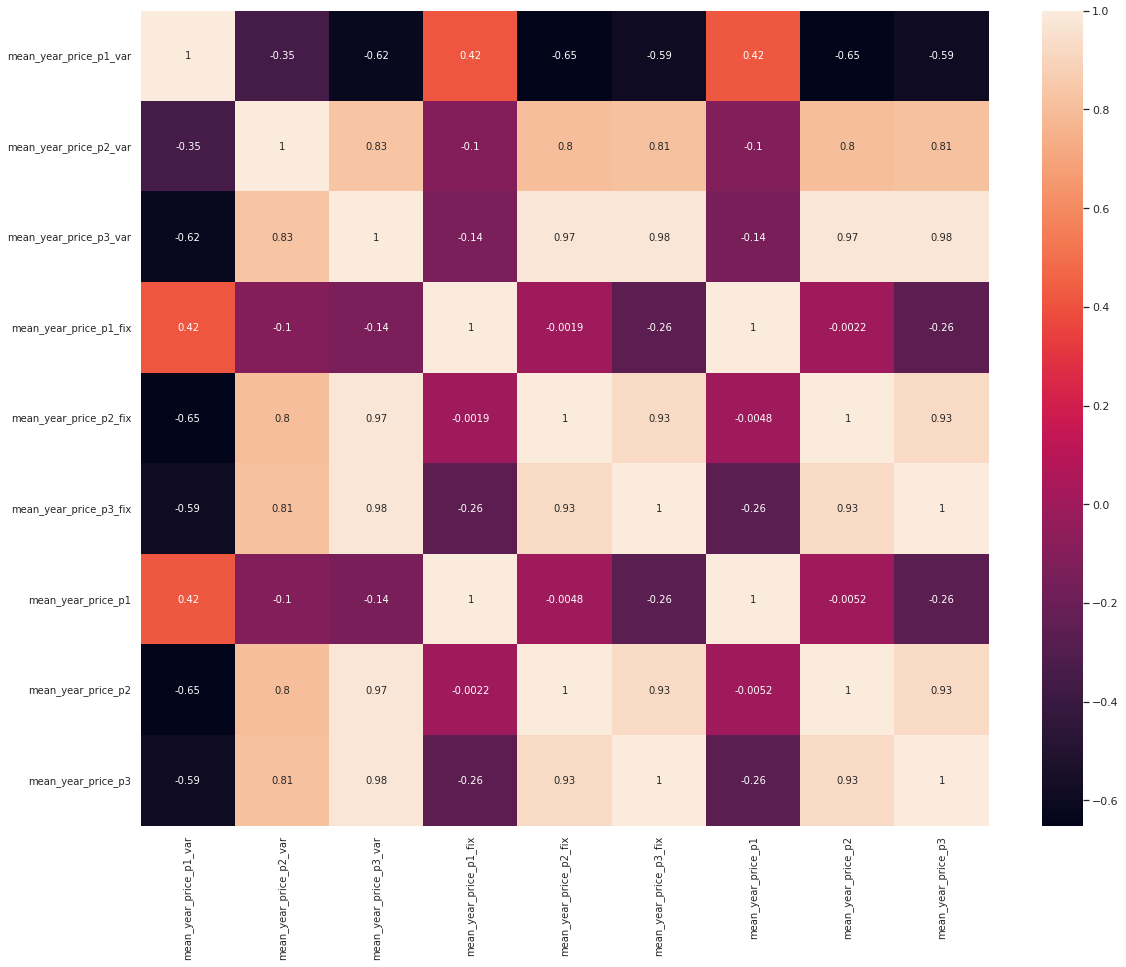

In [92]:
# Plot correlation
plt.figure(figsize=(19,15))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10}) # Axis ticks size
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

All these price variables are highly correlated variables. We can remove highly correlated variables.

Multicollinearity happens when one predictor variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results. Luckily, decision trees and boosted trees algorithms are immune to multicollinearity by nature. When they decide to split, the tree will choose only one of the perfectly correlated features. However, other algorithms like Logistic Regression or Linear Regression are not immune to that problem and should be fixed before training the model.

In [93]:
features.drop(["mean_year_price_p1_var","mean_year_price_p2_var","mean_year_price_p3_var","mean_year_price_p1_fix","mean_year_price_p2_fix","mean_year_price_p3_fix"], axis = 1, inplace = True)

In [94]:
features

,id,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,45.501268,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,40.766185,24.486748,16.328003
4,00114d74e963e47177db89bc70108537,44.414856,0.000000,0.000000
...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,41.035291,24.752581,16.588752
16092,fffac626da707b1b5ab11e8431a4d0a2,44.458512,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,41.314049,25.025265,16.858411
16094,fffe4f5646aa39c7f97f95ae2679ce64,40.730558,24.467516,16.316414


Lets check on the EDA data now 

In [95]:
# Calculate correlation of variables
correlation = df.corr()

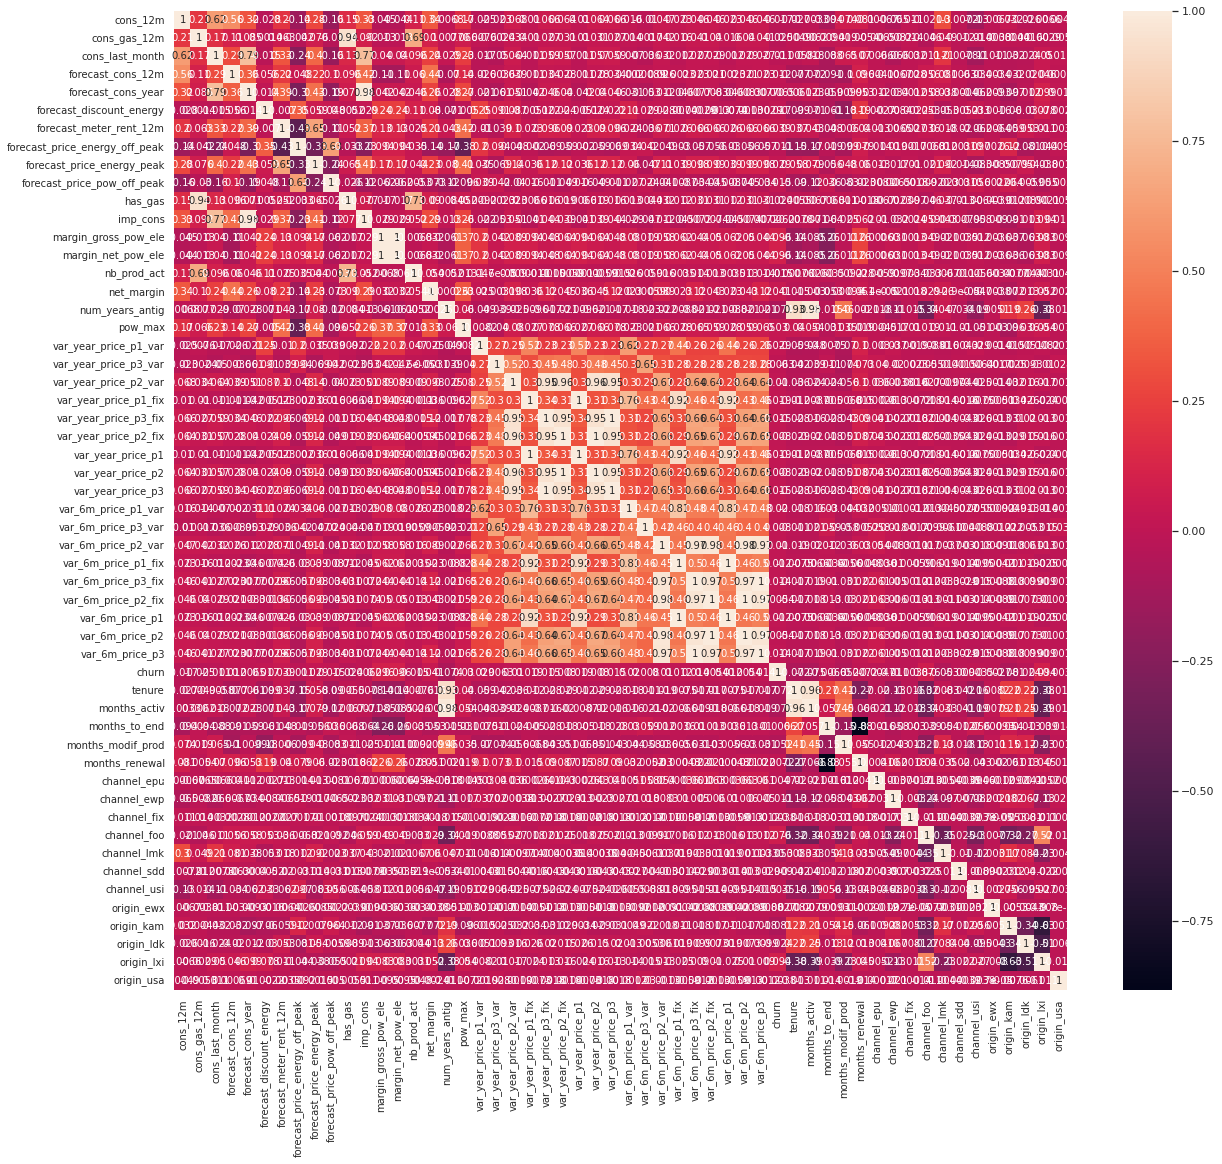

In [96]:
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(correlation, xticklabels=correlation.columns.values,yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10}) # Axis ticks size
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

Now we can see price variance features as highly correlated. We evaluated them during the EDA to test our hypothesis. Now lets get rid of these features. 

In [97]:
df.drop(["var_year_price_p1_var","var_year_price_p2_var","var_year_price_p3_var","var_year_price_p1_fix","var_year_price_p2_fix","var_year_price_p3_fix","var_6m_price_p1_var","var_6m_price_p2_var","var_6m_price_p3_var","var_6m_price_p1_fix","var_6m_price_p2_fix","var_6m_price_p3_fix","var_6m_price_p1","var_6m_price_p2","var_6m_price_p3","var_year_price_p1","var_year_price_p2","var_year_price_p3"], axis = 1, inplace = True)

In [98]:
# Calculate correlation of variables
correlation = df.corr()

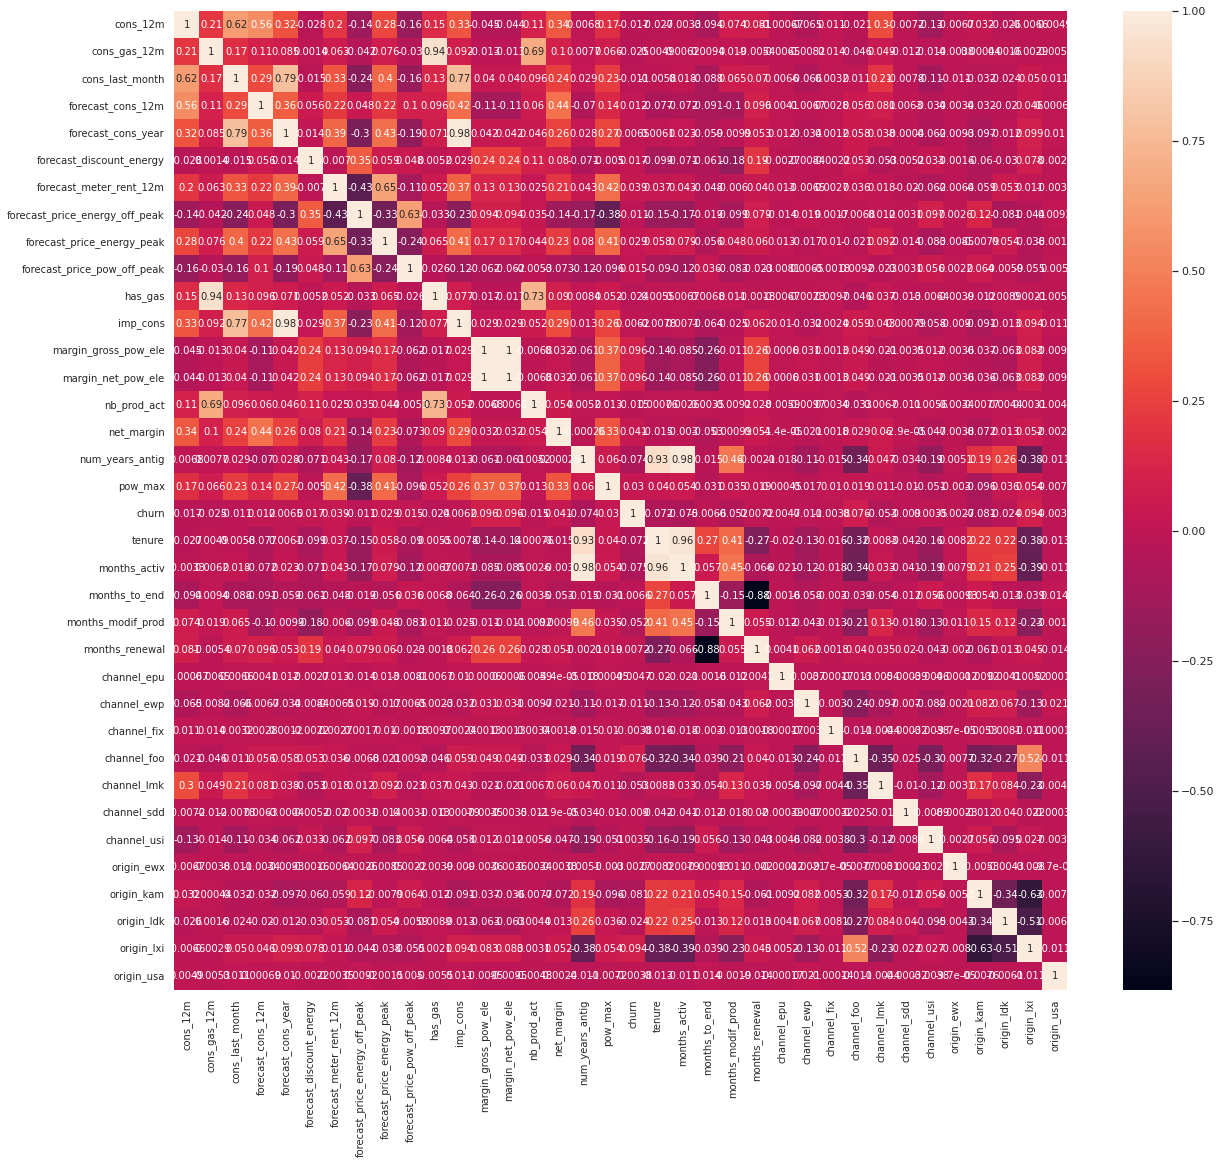

In [99]:
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(correlation, xticklabels=correlation.columns.values,yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10}) # Axis ticks size
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

In [100]:
df.drop(columns=["num_years_antig", "forecast_cons_year","months_activ"],inplace=True)

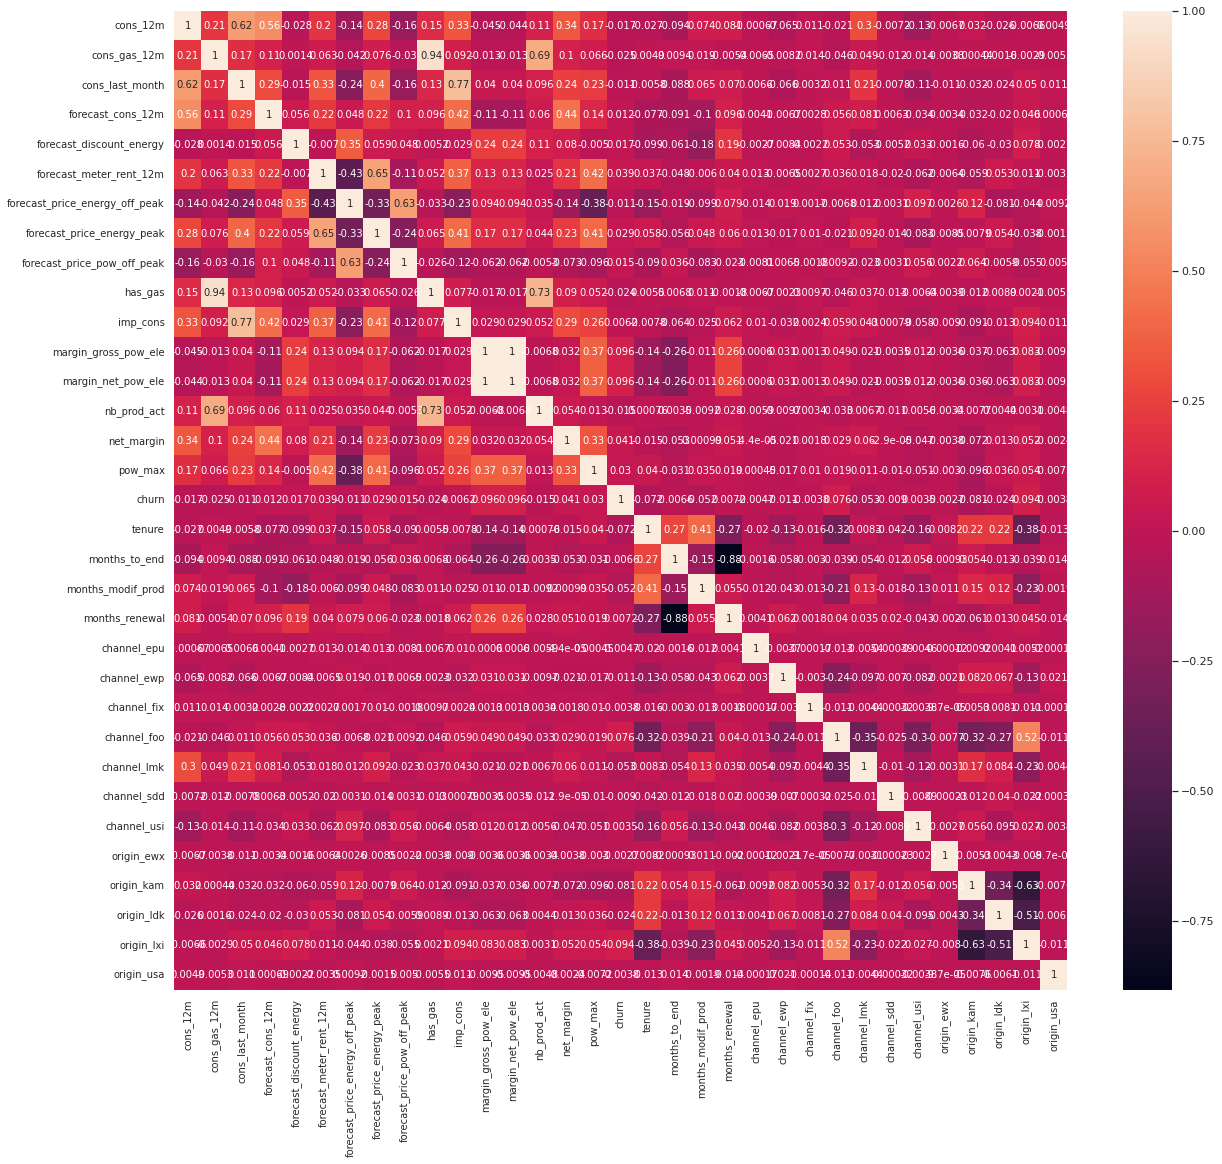

In [101]:
# Calculate correlation of variables
correlation = df.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(correlation, xticklabels=correlation.columns.values,yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10}) # Axis ticks size
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

In [106]:
df.drop(["margin_net_pow_ele"], axis = 1, inplace = True)

## Outliers Analysis and Removal 

There are several ways to handle with those outliers such as removing them (this works well for massive datasets) or replacing them with sensible data(works better when the dataset is not that big).

We will replace the outliers with the mean (average of the values excluding outliers). We could also replace them by median as median is not prone to outlier effect. 

In [102]:
def replace_outliers_z_score(dataframe, column, Z=3): 
    """
    Replace outliers with the mean values using the Z score.
    Nan values are also replaced with the mean values.
    Parameters
    ----------
    dataframe : pandas dataframe
        Contains the data where the outliers are to be found
    column : str
        Usually a string with the name of the column
    Returns
    -------
    Dataframe
        With outliers under the lower and above the upper bound removed
    """
    from scipy.stats import zscore 
    df = dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])
        # Calculate mean without outliers
    df["zscore"] = zscore(df[column])
    mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()
        # Replace with mean values
    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    no_outliers = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape[0] 
    dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_
        # Print message
    print("Replaced:", no_outliers, " outliers in ", column) 
    return dataframe.drop(columns="zscore")

In [103]:
for c in features.columns: 
  if c != "id":
    features = replace_outliers_z_score(features,c)

Replaced: 122  outliers in  mean_year_price_p1
Replaced: 0  outliers in  mean_year_price_p2
Replaced: 0  outliers in  mean_year_price_p3


In [104]:
features.reset_index(drop=True, inplace=True)

In [105]:
def _find_outliers_iqr(dataframe, column): 
  """
    Find outliers using the 1.5*IQR rule.
    Parameters
    ----------
    dataframe : pandas dataframe
        Contains the data where the outliers are to be found
    column : str
        Usually a string with the name of the column
    Returns
    -------
    Dict
        With the values of the iqr, lower_bound and upper_bound
    """
  col = sorted(dataframe[column]) 
  q1, q3= np.percentile(col,[25,75]) 
  iqr = q3 - q1
  lower_bound = q1 -(1.5 * iqr) 
  upper_bound = q3 +(1.5 * iqr)
  results = {"iqr": iqr, "lower_bound":lower_bound, "upper_bound":upper_bound} 
  return results
def remove_outliers_iqr(dataframe, column): 
  """
    Remove outliers using the 1.5*IQR rule.
    Parameters
    ----------
    dataframe : pandas dataframe
        Contains the data where the outliers are to be found
    column : str
        Usually a string with the name of the column
    Returns
    -------
    Dataframe
        With outliers under the lower and above the upper bound removed
    """
  outliers = _find_outliers_iqr(dataframe, column)
  removed = dataframe[(dataframe[column] < outliers["lower_bound"])|(dataframe[column] > outliers["upper_bound"])].shape
  dataframe = dataframe[(dataframe[column] > outliers["lower_bound"]) & (dataframe[column] < outliers["upper_bound"])]
  print("Removed:", removed[0], " outliers") 
  return dataframe

In [108]:
df = replace_outliers_z_score(df,"cons_12m")
df = replace_outliers_z_score(df,"cons_gas_12m")
df = replace_outliers_z_score(df,"cons_last_month")
df = replace_outliers_z_score(df,"forecast_cons_12m") #df = replace_outliers_z_score(df,"forecast_cons_year") 
df = replace_outliers_z_score(df,"forecast_discount_energy") 
df = replace_outliers_z_score(df,"forecast_meter_rent_12m") 
df = replace_outliers_z_score(df,"forecast_price_energy_off_peak") 
df = replace_outliers_z_score(df,"forecast_price_energy_peak") 
df = replace_outliers_z_score(df,"forecast_price_pow_off_peak") 
df = replace_outliers_z_score(df,"imp_cons")
df = replace_outliers_z_score(df,"margin_gross_pow_ele") 
df = replace_outliers_z_score(df,"net_margin")
df = replace_outliers_z_score(df,"pow_max")
df = replace_outliers_z_score(df,"months_to_end")
df = replace_outliers_z_score(df,"months_modif_prod")
df = replace_outliers_z_score(df,"months_renewal")

Replaced: 103  outliers in  cons_12m
Replaced: 158  outliers in  cons_gas_12m
Replaced: 0  outliers in  cons_last_month
Replaced: 150  outliers in  forecast_cons_12m
Replaced: 2  outliers in  forecast_discount_energy
Replaced: 0  outliers in  forecast_meter_rent_12m
Replaced: 234  outliers in  forecast_price_energy_off_peak
Replaced: 0  outliers in  forecast_price_energy_peak
Replaced: 331  outliers in  forecast_price_pow_off_peak
Replaced: 0  outliers in  imp_cons
Replaced: 238  outliers in  margin_gross_pow_ele
Replaced: 76  outliers in  net_margin
Replaced: 302  outliers in  pow_max
Replaced: 2  outliers in  months_to_end
Replaced: 141  outliers in  months_modif_prod
Replaced: 112  outliers in  months_renewal


In [109]:
df.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

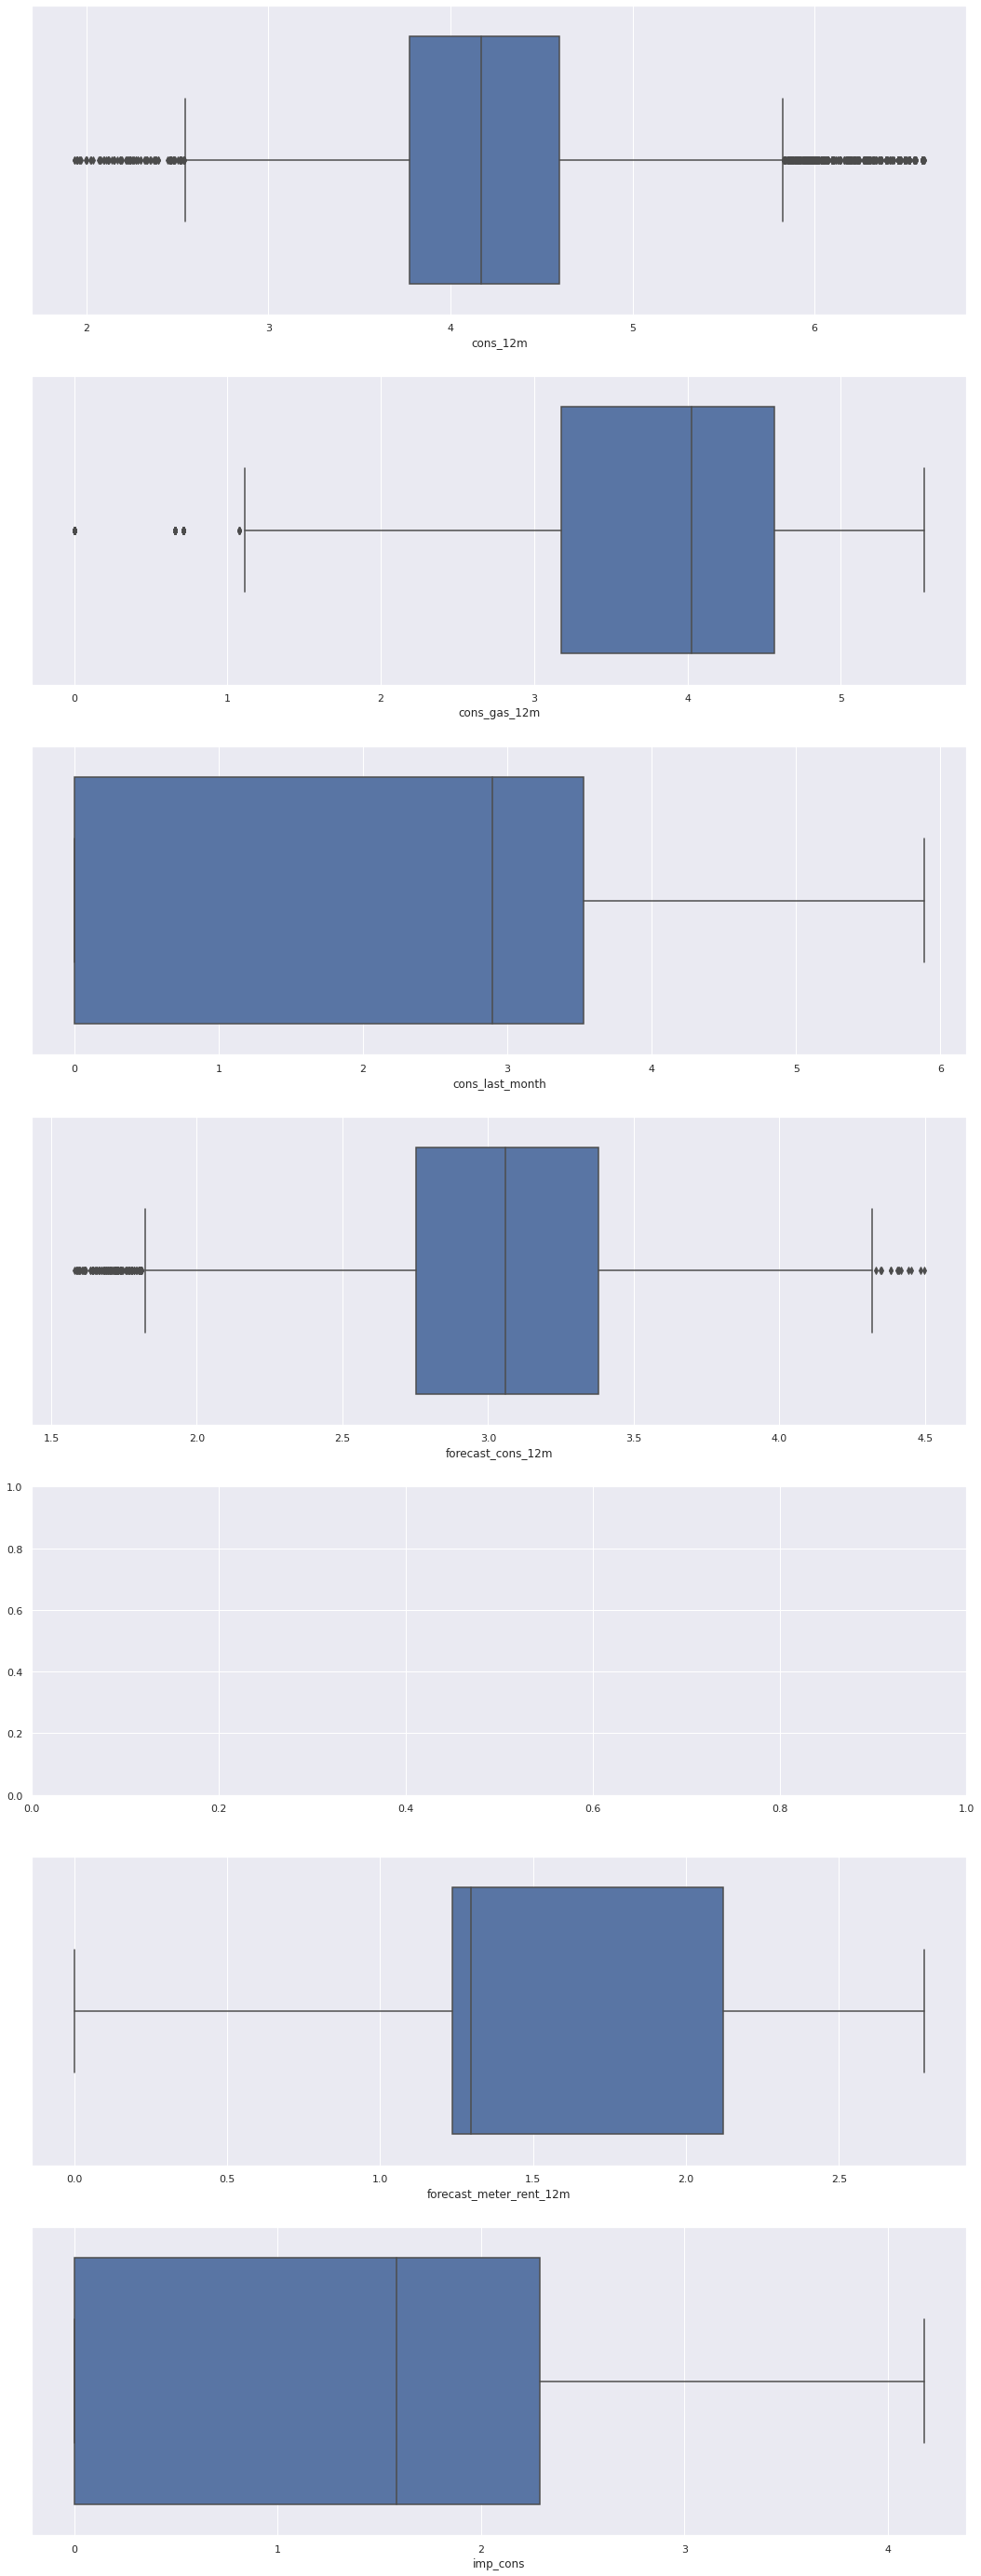

In [110]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((df["cons_12m"].dropna()), ax=axs[0]) 
sns.boxplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1]) 
sns.boxplot((df["cons_last_month"].dropna()), ax=axs[2]) 
sns.boxplot((df["forecast_cons_12m"].dropna()), ax=axs[3]) #sns.boxplot((df["forecast_cons_year"].dropna()), ax=axs[4]) 
sns.boxplot((df["forecast_meter_rent_12m"].dropna()), ax=axs[5]) 
sns.boxplot((df["imp_cons"].dropna()), ax=axs[6])
plt.show()

## Merging of the dataframes df and features

In [111]:
df

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,nb_prod_act,net_margin,pow_max,churn,tenure,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa
0,24011ae4ebbe3035111d65fa7c15bc57,4.268365,4.739944,0.000000,3.041639,0.0,0.444045,0.114481,0.098142,40.606701,1,0.000000,25.44,2,678.99,43.648,1,3,5.0,2.0,6.000000,0,0,0,1,0,0,0,0,0,0,1,0
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,0,0.000000,16.38,1,18.89,13.800,0,7,7.0,76.0,4.000000,0,0,0,0,0,0,0,0,1,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,0,0.000000,28.60,1,6.60,13.856,0,6,3.0,68.0,8.000000,0,0,0,1,0,0,0,0,1,0,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,0,0.000000,30.22,1,25.46,13.200,0,6,2.0,69.0,9.000000,0,0,0,0,1,0,0,0,1,0,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,0,1.726890,44.91,1,47.98,19.800,0,6,2.0,71.0,9.000000,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,4.508812,4.680707,0.000000,3.667360,0.0,1.291591,0.138305,0.000000,44.311378,1,0.000000,27.88,2,381.77,15.000,0,3,4.0,7.0,4.788119,0,0,0,1,0,0,0,0,0,0,1,0
14602,d0a6f71671571ed83b2645d23af6de00,3.858778,0.000000,2.260071,2.801191,0.0,2.161458,0.100167,0.091892,43.148907,0,1.228913,0.00,1,90.34,6.000,1,4,7.0,40.0,4.000000,0,0,0,1,0,0,0,0,0,0,1,0
14603,10e6828ddd62cbcf687cb74928c4c2d2,3.265996,0.000000,2.255273,2.281919,0.0,2.115943,0.116900,0.100015,40.606701,0,1.279895,39.84,1,20.38,15.935,1,3,1.0,46.0,10.000000,0,0,0,1,0,0,0,0,0,0,1,0
14604,1cf20fd6206d7678d5bcafd28c53b4db,2.120574,0.000000,0.000000,3.058385,0.0,0.912753,0.145711,0.000000,44.311378,0,0.000000,13.08,1,0.96,11.000,0,4,7.0,40.0,4.000000,0,0,0,1,0,0,0,0,0,0,1,0


In [114]:
features

,id,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,45.501268,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,40.766185,24.486748,16.328003
4,00114d74e963e47177db89bc70108537,44.414856,0.000000,0.000000
...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,41.035291,24.752581,16.588752
16092,fffac626da707b1b5ab11e8431a4d0a2,44.458512,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,41.314049,25.025265,16.858411
16094,fffe4f5646aa39c7f97f95ae2679ce64,40.730558,24.467516,16.316414


In [115]:
df_final = pd.merge(df,features, on = "id")

## Pickling of the Data 

In [116]:
df_final

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,nb_prod_act,net_margin,pow_max,churn,tenure,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,24011ae4ebbe3035111d65fa7c15bc57,4.268365,4.739944,0.000000,3.041639,0.0,0.444045,0.114481,0.098142,40.606701,1,0.000000,25.44,2,678.99,43.648,1,3,5.0,2.0,6.000000,0,0,0,1,0,0,0,0,0,0,1,0,41.067053,22.452760,14.967871
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,0,0.000000,16.38,1,18.89,13.800,0,7,7.0,76.0,4.000000,0,0,0,0,0,0,0,0,1,0,0,0,44.460984,0.007124,0.000000
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,0,0.000000,28.60,1,6.60,13.856,0,6,3.0,68.0,8.000000,0,0,0,1,0,0,0,0,1,0,0,0,44.555962,0.088421,0.000000
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,0,0.000000,30.22,1,25.46,13.200,0,6,2.0,69.0,9.000000,0,0,0,0,1,0,0,0,1,0,0,0,44.551475,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,0,1.726890,44.91,1,47.98,19.800,0,6,2.0,71.0,9.000000,0,0,0,0,0,0,0,0,1,0,0,0,40.812330,24.516531,16.348129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,4.508812,4.680707,0.000000,3.667360,0.0,1.291591,0.138305,0.000000,44.311378,1,0.000000,27.88,2,381.77,15.000,0,3,4.0,7.0,4.788119,0,0,0,1,0,0,0,0,0,0,1,0,44.514760,0.000000,0.000000
14602,d0a6f71671571ed83b2645d23af6de00,3.858778,0.000000,2.260071,2.801191,0.0,2.161458,0.100167,0.091892,43.148907,0,1.228913,0.00,1,90.34,6.000,1,4,7.0,40.0,4.000000,0,0,0,1,0,0,0,0,0,0,1,0,59.122473,36.488785,8.416235
14603,10e6828ddd62cbcf687cb74928c4c2d2,3.265996,0.000000,2.255273,2.281919,0.0,2.115943,0.116900,0.100015,40.606701,0,1.279895,39.84,1,20.38,15.935,1,3,1.0,46.0,10.000000,0,0,0,1,0,0,0,0,0,0,1,0,40.826071,24.524832,16.353854
14604,1cf20fd6206d7678d5bcafd28c53b4db,2.120574,0.000000,0.000000,3.058385,0.0,0.912753,0.145711,0.000000,44.311378,0,0.000000,13.08,1,0.96,11.000,0,4,7.0,40.0,4.000000,0,0,0,1,0,0,0,0,0,0,1,0,44.460984,0.007124,0.000000


In [118]:
df_final.to_pickle("/content/drive/MyDrive/Hamed Presentation /feature_engineering_data.pkl")

In [119]:
df_test = pd.read_pickle("/content/drive/MyDrive/Hamed Presentation /feature_engineering_data.pkl")

In [121]:
df_test == df_final

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,nb_prod_act,net_margin,pow_max,churn,tenure,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
14602,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
14603,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
14604,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
